In [1]:
import pandas as pd
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
inpath = '/Users/yanmemgxing/Nutstore Files/scientific group/chemistry/'
group_info = pd.read_csv(f'{inpath}group_info_OnlyLastAuthorPaper(current_scientific_age1213).csv')
file = 'career_span'
career_span = pd.read_csv(f'{inpath}{file}.csv')
tp = career_span[['author_id','first_pub_year']].rename(columns={'author_id':'mentor_id','first_pub_year':'mentor_first_pub_year'}).drop_duplicates()
group_info = group_info.merge(tp,on='mentor_id',how='left')

mentor_scientific_age = group_info['publication_year'] - group_info['mentor_first_pub_year']
group_info['mentor_scientific_age'] = mentor_scientific_age
mentor_current_scientific_age = group_info['current_year'] - group_info['mentor_first_pub_year']
group_info['mentor_current_scientific_age'] = mentor_current_scientific_age

In [3]:
group_info.head(5)

,work_id,author_position,author_id,institution_id,publication_year,first_pub_year,scientific_age,group_size,mentor_id,current_year,ratio_institution,current_scientific_age,last_pub_year,career_len
0,W2138259155,first,A2223507391,I205783295,2004,2004,0,1,A2671777495,2004,1.0,0,2004.0,0.0
1,W2138259155,first,A2223507391,I205783295,2004,2004,0,3,A2671777495,2005,1.0,1,2004.0,0.0
2,W2085228080,first,A2760994840,I205783295,2005,2005,0,3,A2671777495,2005,1.0,0,2005.0,0.0
3,W2152099342,first,A2760994840,I205783295,2005,2005,0,3,A2671777495,2005,1.0,0,2005.0,0.0
4,W2152099342,middle,A2588414634,I205783295,2005,2005,0,3,A2671777495,2005,1.0,0,2005.0,0.0


In [4]:
max(group_info.current_year)

2024

In [5]:
print(len(group_info))

13698311


In [6]:
ratio_institution = group_info[['work_id','ratio_institution']].drop_duplicates()

In [7]:
len(ratio_institution[ratio_institution.ratio_institution==1])

330682

In [8]:
len(ratio_institution)

4751224

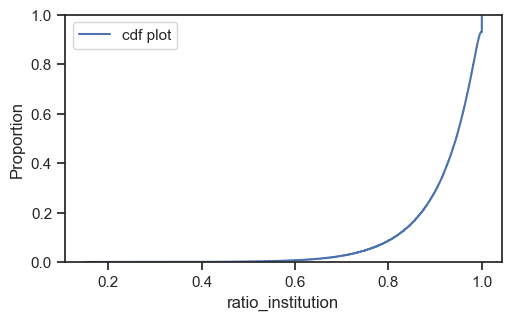

In [9]:
# display preset
sns.set(style='ticks', font_scale=1.0, font='Arial')

fig, ax = plt.subplots(constrained_layout=True,figsize=[1*5,0.618*5])

# plot
# sns.histplot(data=ratio_institution, x="ratio_institution",stat='proportion', #cumulative=1,
#              ax=ax,label='pdf plot')

sns.ecdfplot(data=ratio_institution, x="ratio_institution",stat='proportion',complementary=0,
             ax=ax,label='cdf plot')
plt.legend()

##### current_year is the important iterative variable

#### Case Study

In [11]:
current_year = 1990
completeness = 0.8
mentor_scientific_age = 10

# group_info_2000 = group_info[group_info.current_year==current_year]

group_info_2000 = group_info[['author_id','group_size','career_len','mentor_id']][(group_info.current_year==current_year)
                            &(group_info.ratio_institution>=completeness)
                            &(group_info.mentor_scientific_age>=mentor_scientific_age)].drop_duplicates()   # limitation : the completeness of institution information
print(len(group_info_2000))

35110


In [12]:
group_info_2000.head(5)

,author_id,group_size,career_len,mentor_id
2818,A2838182622,22,3.0,A2159964036
2819,A2142399664,22,8.0,A2159964036
2820,A2077749644,22,1.0,A2159964036
2821,A2699372537,22,0.0,A2159964036
2822,A2133016485,22,37.0,A2159964036


In [13]:
mentor = list(group_info_2000.mentor_id.drop_duplicates())
print(len(mentor))

4276


##### examine whether a mentee has more than one mentor

In [14]:
data = group_info_2000.groupby(['author_id','career_len'])['group_size'].agg('mean').reset_index(name='group_size')

In [15]:
len(data)

34329

In [16]:
data = data.drop_duplicates()
len(data)

34329

In [17]:
group_info_2000 = data

In [18]:
group_info_2000.head(5)

,author_id,career_len,group_size
0,A100079991,3.0,89.0
1,A100113190,16.0,4.0
2,A10018131,25.0,3.0
3,A1002037317,1.0,61.0
4,A1002046686,2.0,31.0


##### threshold of group size

In [19]:
Q75 = np.quantile(group_info_2000['group_size'],0.75)
Q50 = np.quantile(group_info_2000['group_size'],0.50)
Q25 = np.quantile(group_info_2000['group_size'],0.25)
Q10 = np.quantile(group_info_2000['group_size'],0.10)
print('(Q75, Q50, Q25, Q10) : ',(Q75,Q50,Q25,Q10))

(Q75, Q50, Q25, Q10) :  (22.0, 13.0, 7.0, 4.0)


In [20]:
# i = random.sample(range(len(mentor)),1)[0]
# print('i: ',i)
# mentor_i = mentor[i]
# print('mentor_i: ',mentor_i)
# group_i = group_info_2000[group_info_2000.mentor_id==mentor_i]

In [21]:
# group_i.head(5)

#### Survival rate in groups with different size

In [22]:
drop_criteria = 10

G75 = group_info_2000[group_info_2000.group_size>=Q75]
print('len_G75 : ',len(G75))
survial_75 = G75[G75.career_len>=drop_criteria]
print('len_survival_75 : ',len(survial_75))
survival_rate_75 = len(survial_75)/len(G75[G75.career_len>0])                   # denominator： career_len is at least greater than 1.
print('survival_rate_75 : ',survival_rate_75)


G25 = group_info_2000[group_info_2000.group_size<=Q25]
print('len_G25 : ',len(G25))
survial_25 = G25[G25.career_len>=drop_criteria]
print('len_survival_25 : ',len(survial_25))
survival_rate_25 = len(survial_25)/len(G25[G25.career_len>0])   # denominator： career_len is at least greater than 1.
print('survival_rate_25 : ',survival_rate_25)

# G10 = group_info_2000[group_info_2000.group_size<=Q10]
# print('len_G10 : ',len(G10))
# survial_10 = G10[G10.career_len>=drop_criteria]
# print('len_survival_10 : ',len(survial_10))
# survival_rate_10 = len(survial_10)/len(G10)
# print('survival_rate_10 : ',survival_rate_10)

len_G75 :  9260
len_survival_75 :  2486
survival_rate_75 :  0.417184091290485
len_G25 :  8601
len_survival_25 :  2550
survival_rate_25 :  0.4417114152087303


In [23]:
len(G25[G25.career_len==0])/len(G25)

0.32879897686315546

In [14]:
def survial_rate(data,current_year,drop_criteria,completeness,mentor_scientific_age):
    group_info = data
    
    group_info_2000 = group_info[['author_id','group_size','career_len','mentor_id']][(group_info.current_year==current_year)
                            &(group_info.ratio_institution>=completeness)
                            &(group_info.mentor_scientific_age>=mentor_scientific_age)].drop_duplicates()   # limitation : the completeness of institution information
    
    # if a mentee works with two mentor, we use the average group size of two mentor as the mentee's group size
    group_info_2000 = group_info_2000.groupby(['author_id','career_len'])['group_size'].agg('mean').reset_index(name='group_size')
    
    num_of_mentee = len(group_info_2000)
    # print(len(group_info_2000))
    Q75 = np.quantile(group_info_2000['group_size'],0.75)
    Q25 = np.quantile(group_info_2000['group_size'],0.25)
    
    G75 = group_info_2000[group_info_2000.group_size>=Q75]
    # print('len_G75 : ',len(G75))
    survial_75 = G75[G75.career_len>=drop_criteria]
    # print('len_survival_75 : ',len(survial_75))
    survival_rate_75 = len(survial_75)/len(G75[G75.career_len>0])
    # print('survival_rate_75 : ',survival_rate_75)
    
    G25 = group_info_2000[group_info_2000.group_size<=Q25]
    # print('len_G25 : ',len(G25))
    survial_25 = G25[G25.career_len>=drop_criteria]
    # print('len_survival_25 : ',len(survial_25))
    survival_rate_25 = len(survial_25)/len(G25[G25.career_len>0])
    # print('survival_rate_25 : ',survival_rate_25)
    
    return num_of_mentee,survival_rate_75,survival_rate_25

In [15]:
def survial_rate_0(data,current_year,drop_criteria,completeness,mentor_scientific_age):
    group_info = data
    
    group_info_2000 = group_info[['author_id','group_size','career_len','mentor_id']][(group_info.current_year==current_year)
                            &(group_info.ratio_institution>=completeness)
                            &(group_info.mentor_scientific_age>=mentor_scientific_age)].drop_duplicates()   # limitation : the completeness of institution information
    
    # if a mentee works with two mentor, we use the average group size of two mentor as the mentee's group size
    group_info_2000 = group_info_2000.groupby(['author_id','career_len'])['group_size'].agg('mean').reset_index(name='group_size')
    
    num_of_mentee = len(group_info_2000)
    # print(len(group_info_2000))
    Q75 = np.quantile(group_info_2000['group_size'],0.75)
    Q25 = np.quantile(group_info_2000['group_size'],0.25)
    
    G75 = group_info_2000[group_info_2000.group_size>=Q75]
    # print('len_G75 : ',len(G75))
    survial_75 = G75[G75.career_len>=drop_criteria]
    # print('len_survival_75 : ',len(survial_75))
    survival_rate_75 = len(survial_75)/len(G75)
    # print('survival_rate_75 : ',survival_rate_75)
    
    G25 = group_info_2000[group_info_2000.group_size<=Q25]
    # print('len_G25 : ',len(G25))
    survial_25 = G25[G25.career_len>=drop_criteria]
    # print('len_survival_25 : ',len(survial_25))
    survival_rate_25 = len(survial_25)/len(G25)
    # print('survival_rate_25 : ',survival_rate_25)
    
    return num_of_mentee,survival_rate_75,survival_rate_25

In [16]:
#constant variable
data = group_info
mentor_scientific_age = 10

#control variable
drop_criteria = 10
completeness = 0.75

# iterative variable
current_year = 2006


Data = []
years = list(range(1960,2015+1))
# years = list(range(2008,2015+1))
# Drop_Criteria = list(range(5,15+1))
Drop_Criteria = [5,8,10,13,15,18,20]
inst_completeness = [0.60,0.70,0.80,0.90]

for completeness in inst_completeness:
    for drop_criteria in Drop_Criteria:
        for current_year in years:
            print(drop_criteria,completeness,current_year)
            #career_len>1
            # num_of_mentee,big,small = survial_rate(data,current_year,drop_criteria,completeness,mentor_scientific_age)
            #career_len>0
            num_of_mentee,big,small = survial_rate_0(data,current_year,drop_criteria,completeness,mentor_scientific_age)
            
            temp = [current_year,num_of_mentee,format(big,'.4f'),format(small,'.4f'),drop_criteria,completeness]
            Data.append(temp)
        # print('survival rate in Big group :', '{:.2%}'.format(big))
        # print('survival rate in Small group :', '{:.2%}'.format(small))
    

5 0.6 1960
5 0.6 1961
5 0.6 1962
5 0.6 1963
5 0.6 1964
5 0.6 1965
5 0.6 1966
5 0.6 1967
5 0.6 1968
5 0.6 1969
5 0.6 1970
5 0.6 1971
5 0.6 1972
5 0.6 1973
5 0.6 1974
5 0.6 1975
5 0.6 1976
5 0.6 1977
5 0.6 1978
5 0.6 1979
5 0.6 1980
5 0.6 1981
5 0.6 1982
5 0.6 1983
5 0.6 1984
5 0.6 1985
5 0.6 1986
5 0.6 1987
5 0.6 1988
5 0.6 1989
5 0.6 1990
5 0.6 1991
5 0.6 1992
5 0.6 1993
5 0.6 1994
5 0.6 1995
5 0.6 1996
5 0.6 1997
5 0.6 1998
5 0.6 1999
5 0.6 2000
5 0.6 2001
5 0.6 2002
5 0.6 2003
5 0.6 2004
5 0.6 2005
5 0.6 2006
5 0.6 2007
5 0.6 2008
5 0.6 2009
5 0.6 2010
5 0.6 2011
5 0.6 2012
5 0.6 2013
5 0.6 2014
5 0.6 2015
8 0.6 1960
8 0.6 1961
8 0.6 1962
8 0.6 1963
8 0.6 1964
8 0.6 1965
8 0.6 1966
8 0.6 1967
8 0.6 1968
8 0.6 1969
8 0.6 1970
8 0.6 1971
8 0.6 1972
8 0.6 1973
8 0.6 1974
8 0.6 1975
8 0.6 1976
8 0.6 1977
8 0.6 1978
8 0.6 1979
8 0.6 1980
8 0.6 1981
8 0.6 1982
8 0.6 1983
8 0.6 1984
8 0.6 1985
8 0.6 1986
8 0.6 1987
8 0.6 1988
8 0.6 1989
8 0.6 1990
8 0.6 1991
8 0.6 1992
8 0.6 1993
8 0.6 1994

In [19]:
Data = pd.DataFrame(Data,columns=['current_year','num_of_mentee','survival_rate_big_group','survival_rate_small_group','drop_criteria','inst_completeness'])

In [42]:
# data = pd.read_csv('survival_rate_evolution.csv') 

In [43]:
# Data.to_csv('survival_rate_evolution_ave_group_size_mentorAge10.csv',index=0)

In [23]:
# # Data.to_csv('survival_rate_evolution_ave_group_size_mentorAge10_ratioNotnull_greater0_OnlyLastAuthorPaper.csv',index=0)

In [27]:
# Data.to_csv('survival_rate_evolution_ave_group_size_mentorAge10_ratioNotnull_greater1_OnlyLastAuthorPaper.csv',index=0)

#### Plot

##### career_len > 0

In [24]:
Data = pd.read_csv('survival_rate_evolution_ave_group_size_mentorAge10_ratioNotnull_greater0_OnlyLastAuthorPaper.csv')

##### career_len > 1 

In [25]:
# Data = pd.read_csv('survival_rate_evolution_ave_group_size_mentorAge10_ratioNotnull_greater1_OnlyLastAuthorPaper.csv')

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

##### Note: inst_completeness==0.6 means inst_completeness>=0.6 in real

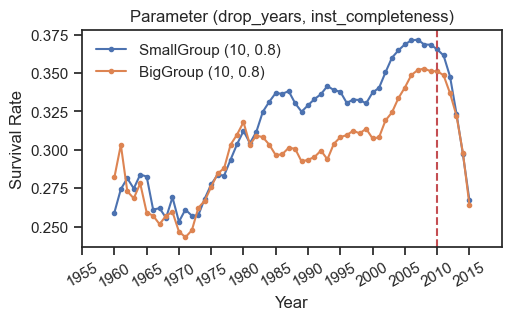

In [21]:
Drop_Criteria = list(range(5,15+1))
inst_completeness = [0.60,0.65,0.70,0.75,0.80,0.85,0.90]

# input parameter
drop_criteria = 10
completeness = 0.8

df = Data[(Data.drop_criteria==drop_criteria)&(Data.inst_completeness==completeness)].sort_values(by='current_year')

# display preset
sns.set(style='ticks', font_scale=1.0, font='Arial')

# data
x = list(df.current_year)
y_small = [float(k) for k in list(df.survival_rate_small_group)]
y_big = [float(k) for k in list(df.survival_rate_big_group)]

fig, ax = plt.subplots(constrained_layout=True,figsize=[1*5,0.618*5])

# plot
ax.plot(x, y_small, label=f'SmallGroup ({drop_criteria}, {completeness})', marker='.')
ax.plot(x, y_big, label=f'BigGroup ({drop_criteria}, {completeness})', marker='.')

# annotation set
ax.legend(loc=2,frameon=0)
ax.set(xlim=(x[0]-5, x[-1]+5),xticks=np.arange(x[0]-5, x[-1]+5,5),
       # ylim=(0.2, 0.6), yticks=np.arange(0.2, 0.6, 0.1),
       xlabel='Year', 
       ylabel='Survival Rate',
       title=f'Parameter (drop_years, inst_completeness)'
      )
ax.set_xticks(ticks=np.arange(x[0]-5, x[-1]+5,5),labels=np.arange(x[0]-5, x[-1]+5,5),rotation=30)
ax.axvline(x=2022-2-drop_criteria,ls='--',color='r')
ax.annotate('Accurate Line', xy=(2022-5-drop_criteria, 0.5), xytext=(2022-5-drop_criteria, 0.56),
            arrowprops=dict(facecolor='r', shrink=0.05,edgecolor='r'),fontsize=10)
plt.show()

# save fig
# fig.savefig(f'figs/Parameter {(drop_criteria, completeness)}.pdf')

In [6]:
df.head(5)

,current_year,num_of_mentee,survival_rate_big_group,survival_rate_small_group,drop_criteria,inst_completeness
112,1960,2081,0.4130,0.4299,10,0.6
113,1961,2266,0.4160,0.4426,10,0.6
114,1962,2413,0.3800,0.4465,10,0.6
115,1963,2718,0.4005,0.4505,10,0.6
116,1964,3116,0.4086,0.4638,10,0.6


In [7]:
# # display preset
# sns.set(style='ticks', font_scale=1.0, font='Arial')

# # data
# x = list(df.current_year)
# y_small = [float(k) for k in list(df.survival_rate_small_group)]
# y_big = [float(k) for k in list(df.survival_rate_big_group)]

# fig, ax = plt.subplots(constrained_layout=True,figsize=[1*5,0.618*5])

# # plot
# ax.plot(x, y_small, label=f'SmallGroup ({drop_criteria}, {completeness})', marker='.')
# ax.plot(x, y_big, label=f'BigGroup ({drop_criteria}, {completeness})', marker='.')

# # annotation set
# ax.legend(loc=4,frameon=0)
# ax.set(xlim=(x[0]-5, x[-1]+5),xticks=np.arange(x[0]-5, x[-1]+5,5),
#        ylim=(0.1, 0.65), yticks=np.arange(0.1, 0.65, 0.1),
#        xlabel='Year', 
#        ylabel='Survival Rate',
#        title=f'Parameter (drop_years, inst_completeness)'
#       )
# # ax.annotate('policy year', xy=(0.5, 12), xytext=(5, 13),
# #             arrowprops=dict(facecolor='r', shrink=0.05,edgecolor='r'))
# plt.show()

# # save fig
# fig.savefig(f'figs/Parameter {(drop_criteria, completeness)}.pdf')